**◙ LAB 8 Monte Carlo – 01 Knapsack Counting**

![01knapsack[1].png](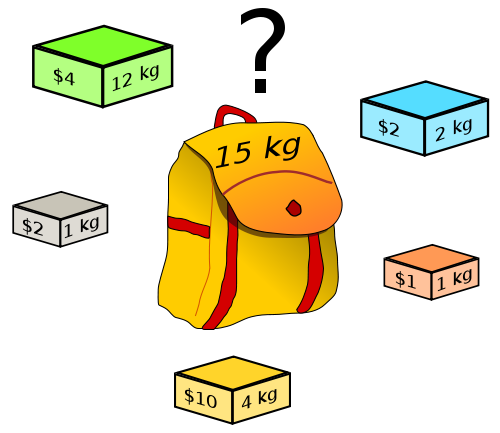)

Count and calculate the exact proportion of  “Knapsack solutions.” for the problem in the image

\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Combinación} & \text{Caja Verde} & \text{Caja Gris} & \text{Caja Azul} & \text{Caja Naranja} & \text{Caja Amarilla} \\
\hline
1 & 1 & 1 & 1 & 1 & 1 \\
2 & 1 & 1 & 1 & 1 & 0 \\
3 & 1 & 1 & 1 & 0 & 1 \\
4 & 1 & 1 & 1 & 0 & 0 \\
5 & 1 & 1 & 0 & 1 & 1 \\
6 & 1 & 1 & 0 & 1 & 0 \\
7 & 1 & 1 & 0 & 0 & 1 \\
8 & 1 & 1 & 0 & 0 & 0 \\
9 & 1 & 0 & 1 & 1 & 1 \\
10 & 1 & 0 & 1 & 1 & 0 \\
11 & 1 & 0 & 1 & 0 & 1 \\
12 & 1 & 0 & 1 & 0 & 0 \\
13 & 1 & 0 & 0 & 1 & 1 \\
14 & 1 & 0 & 0 & 1 & 0 \\
15 & 1 & 0 & 0 & 0 & 1 \\
16 & 1 & 0 & 0 & 0 & 0 \\
17 & 0 & 1 & 1 & 1 & 1 \\
18 & 0 & 1 & 1 & 1 & 0 \\
19 & 0 & 1 & 1 & 0 & 1 \\
20 & 0 & 1 & 1 & 0 & 0 \\
21 & 0 & 1 & 0 & 1 & 1 \\
22 & 0 & 1 & 0 & 1 & 0 \\
23 & 0 & 1 & 0 & 0 & 1 \\
24 & 0 & 1 & 0 & 0 & 0 \\
25 & 0 & 0 & 1 & 1 & 1 \\
26 & 0 & 0 & 1 & 1 & 0 \\
27 & 0 & 0 & 1 & 0 & 1 \\
28 & 0 & 0 & 1 & 0 & 0 \\
29 & 0 & 0 & 0 & 1 & 1 \\
30 & 0 & 0 & 0 & 1 & 0 \\
31 & 0 & 0 & 0 & 0 & 1 \\
32 & 0 & 0 & 0 & 0 & 0 \\
\hline
\end{array}
Estass son todas las posibles combinaciones, a continuación calculamos el peso total y el valor para cada combinación.\begin{array}{|c|c|c|}
\hline
\text{Combinación} & \text{Peso Total} & \text{Valor Total} \\
\hline
1 & 15 & 19 \\
2 & 13 & 15 \\
3 & 15 & 17 \\
4 & 13 & 11 \\
5 & 14 & 14 \\
6 & 12 & 10 \\
7 & 13 & 12 \\
8 & 11 & 6 \\
9 & 14 & 15 \\
10 & 12 & 13 \\
11 & 13 & 11 \\
12 & 11 & 7 \\
13 & 10 & 9 \\
14 & 6 & 5 \\
15 & 7 & 6 \\
16 & 4 & 3 \\
17 & 15 & 17 \\
18 & 13 & 15 \\
19 & 15 & 11 \\
20 & 13 & 7 \\
21 & 10 & 9 \\
22 & 6 & 5 \\
23 & 7 & 4 \\
24 & 5 & 2 \\
25 & 14 & 13 \\
26 & 10 & 8 \\
27 & 11 & 9 \\
28 & 9 & 5 \\
29 & 6 & 6 \\
30 & 1 & 1 \\
31 & 5 & 3 \\
32 & 0 & 0 \\
\hline
\end{array}

Ahora tenemos que seleccionar cual/cuántos de los anteriores cumplen con el peso limite

Número de soluciones cumpliendo con la restricción de peso: 17

Número total de combinaciones posibles: 32

Proporción de soluciones cumpliendo con la restricción d peso: 17/32 ≈ 0.53125


In [20]:
import itertools

def brute_force_knapsack(items, capacity):
    max_value = 0
    best_combination = None

    # Generar todas las combinaciones posibles de artículos
    for combination in itertools.product([0, 1], repeat=len(items)):
        total_weight = sum(combination[i] * items[i][1] for i in range(len(items)))
        total_value = sum(combination[i] * items[i][2] for i in range(len(items)))  # Corrección aquí

        # Verificar si la combinación es válida y si maximiza el valor
        if total_weight <= capacity and total_value > max_value:
            max_value = total_value
            best_combination = combination

    return max_value, best_combination

# Definir los artículos y su peso y valor respectivos
items = [("verde", 12, 4), ("gris", 1, 2), ("azul", 2, 2), ("naranja", 1, 1), ("amarilla", 4, 10)]

# Definir la capacidad de la mochila
capacity = 15

# Calcular la mejor combinación y su valor máximo
max_value, best_combination = brute_force_knapsack(items, capacity)

print("Valor máximo:", max_value)
print("Mejor combinación de artículos:")
for i in range(len(items)):
    if best_combination[i] == 1:
        print(items[i][0])


Valor máximo: 15
Mejor combinación de artículos:
gris
azul
naranja
amarilla


2. Estimar la proporción y el número de soluciones de la mochila ("Knapsack solutions") utilizando el método de Monte Carlo con 1,000 y 10,000 vectores binarios aleatorios

*ref: https://medium.com/@okanyenigun/knapsack-problem-dynamic-programming-solution-bdf48365b759*

In [ ]:
import numpy as np

def knapsack_weight_value(selection, sizes, values):
    total_weight = np.sum(selection * sizes)
    total_value = np.sum(selection * values)
    return total_weight, total_value

def knapsack_solutions(sizes, capacity, num_samples):
    num_items = len(sizes)
    values = np.arange(1, num_items + 1)
    solutions_within_capacity = 0
    for _ in range(num_samples):
        selection = np.random.randint(2, size=num_items)
        weight, _ = knapsack_weight_value(selection, sizes, values)
        if weight <= capacity:
            solutions_within_capacity += 1
    proportion_within_capacity = solutions_within_capacity / num_samples
    num_solutions_within_capacity = int(proportion_within_capacity * num_samples)
    return proportion_within_capacity, num_solutions_within_capacity

sizes = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10])
capacity = 10

# Estimate with 1,000 random binary vectors
proportion_1000, num_solutions_1000 = knapsack_solutions(sizes, capacity, 1000)
print("Estimate with 1,000 random binary vectors:")
print("Proportion of solutions within capacity:", proportion_1000)
print("Number of solutions within capacity:", num_solutions_1000)

# Estimate with 10,000 random binary vectors
proportion_10000, num_solutions_10000 = knapsack_solutions(sizes, capacity, 10000)
print("\nEstimate with 10,000 random binary vectors:")
print("Proportion of solutions within capacity:", proportion_10000)
print("Number of solutions within capacity:", num_solutions_10000)


Estimate with 1,000 random binary vectors:
Proportion of solutions within capacity: 0.078
Number of solutions within capacity: 78

Estimate with 10,000 random binary vectors:
Proportion of solutions within capacity: 0.0716
Number of solutions within capacity: 716


Ahora estimarlos  la proporción y el número de soluciones de la mochila para diferentes capacidades de mochila y tamaños de elementos utilizando el método de Monte Carlo con 10,000, 100,000 y 1,000,000 vectores binarios aleatorios

*ref: https://github.com/DamascenoRafael/mcmc-knapsack-problem*

In [11]:
import numpy as np

def knapsack_weight_value(selection, sizes, values):
    total_weight = np.sum(selection * sizes)
    total_value = np.sum(selection * values)
    return total_weight, total_value

def knapsack_solutions(sizes, capacity, num_samples):
    num_items = len(sizes)
    values = np.arange(1, num_items + 1)  # Assigning values to items
    solutions_within_capacity = 0
    for _ in range(num_samples):
        selection = np.random.randint(2, size=num_items)  # Generating a random binary vector
        weight, _ = knapsack_weight_value(selection, sizes, values)
        if weight <= capacity:
            solutions_within_capacity += 1
    proportion_within_capacity = solutions_within_capacity / num_samples
    num_solutions_within_capacity = int(proportion_within_capacity * num_samples)
    return proportion_within_capacity, num_solutions_within_capacity

sizes = np.arange(1, 51)
capacities = [10, 50, 100, 1275]
num_samples = [10000, 100000, 1000000]

for capacity in capacities:
    for num_sample in num_samples:
        proportion, num_solutions = knapsack_solutions(sizes, capacity, num_sample)
        print(f"Capacidad de la mochila: {capacity}, Número de muestras: {num_sample}")
        print("Proporción de soluciones dentro de la capacidad:", proportion)
        print("Número de soluciones dentro de la capacidad:", num_solutions)
        print()


Capacidad de la mochila: 10, Número de muestras: 10000
Proporción de soluciones dentro de la capacidad: 0.0
Número de soluciones dentro de la capacidad: 0

Capacidad de la mochila: 10, Número de muestras: 100000
Proporción de soluciones dentro de la capacidad: 0.0
Número de soluciones dentro de la capacidad: 0

Capacidad de la mochila: 10, Número de muestras: 1000000
Proporción de soluciones dentro de la capacidad: 0.0
Número de soluciones dentro de la capacidad: 0

Capacidad de la mochila: 50, Número de muestras: 10000
Proporción de soluciones dentro de la capacidad: 0.0
Número de soluciones dentro de la capacidad: 0

Capacidad de la mochila: 50, Número de muestras: 100000
Proporción de soluciones dentro de la capacidad: 0.0
Número de soluciones dentro de la capacidad: 0

Capacidad de la mochila: 50, Número de muestras: 1000000
Proporción de soluciones dentro de la capacidad: 0.0
Número de soluciones dentro de la capacidad: 0

Capacidad de la mochila: 100, Número de muestras: 10000
Pr